## Numerische Algorithmen - Ausgleichsgerade

Aufgabe der Ausgleichsrechnung ist es, Daten durch eine Funktion zu beschreiben, z.B. durch eine Gerade, also eine lineare Funktion. Dabei ist zu beachten, dass üblicherweise Messdaten durch Rauschen überlagert werden, in der Regel liegen also z.B. Messdaten nicht exakt auf einer Gerade.

   Masse  Ausdehnung
0    0.0           0
1    0.5          20
2    1.0          55
3    1.5          78
4    2.0          98
5    2.5         130
6    3.0         154
7    3.5         173
8    4.0         205


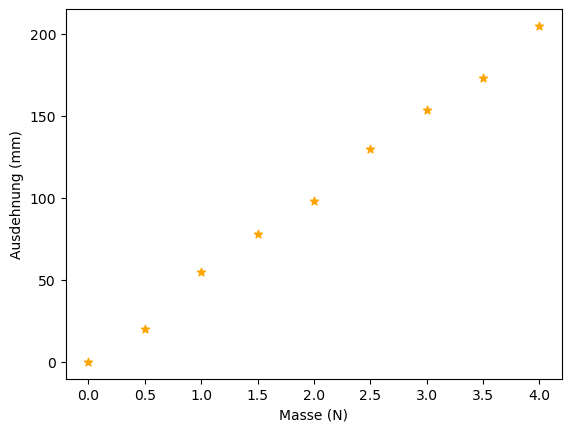

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
feder = pd.read_csv("feder.csv")

# Streudiagramm zeichnen
plt.scatter(feder['Masse'],feder['Ausdehnung'],marker='*', color='orange')
plt.xlabel("Masse (N)")
plt.ylabel("Ausdehnung (mm)")
print(feder)


Text(0, 0.5, 'Gewicht (kg)')

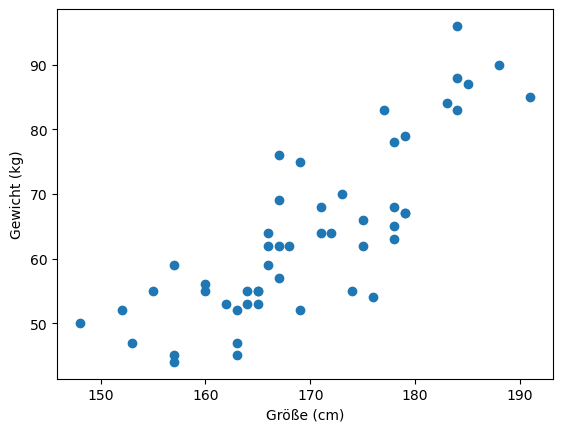

In [3]:
personen = pd.read_csv("weight.csv")

# Streudiagramm zeichnen
plt.scatter(personen['height'],personen['weight'])
plt.xlabel("Größe (cm)")
plt.ylabel("Gewicht (kg)")


const    -121.765217
height      1.093338
dtype: float64


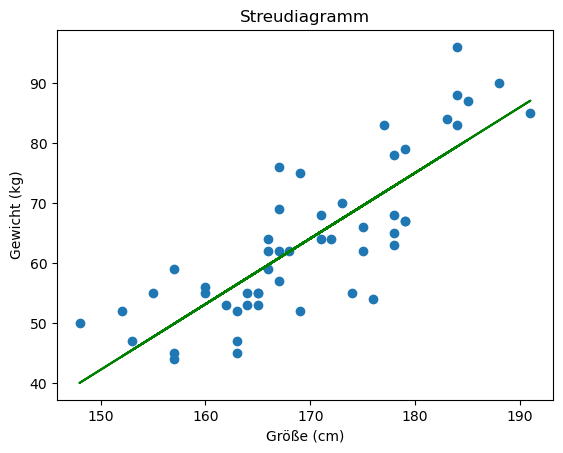

In [5]:
import statsmodels.api as sm

X= sm.add_constant(personen.height)  #erweiterte Datenmatrix
Y=personen.weight
myModel=sm.OLS(Y,X)                 # Modell wählen
result=myModel.fit()                # Modell an Daten anpassen


print(result.params)                # Regressionkoeffizienten

#%%
#Streudiagramm 
plt.figure()
plt.scatter(personen.height,personen.weight)
plt.title('Streudiagramm');
plt.xlabel('Größe (cm)');
plt.ylabel('Gewicht (kg)');
#%%
#Einzeichnen der Regressiongeraden
#Modellwerte
ModellWerte=result.fittedvalues;
plt.plot(personen.height,ModellWerte,'g')


In [6]:
# Vorhersage für zwei Personen
newX=sm.add_constant([185,155])
ModellWerte=result.predict(newX)
print(ModellWerte)

[80.50229161 47.70215516]


In [7]:
# Informationen zur Güte des Modells
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.28e-13
Time:                        18:22:28   Log-Likelihood:                -174.37
No. Observations:                  51   AIC:                             352.7
Df Residuals:                      49   BIC:                             356.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -121.7652     18.339     -6.640      0.0

[6.82764627 6.80382408 6.76809079 6.72044641 6.70853531 6.64897983
 6.37502463 6.36311353 6.35120244 6.30355805 6.12489161 6.12489161
 6.08915833 6.05342504 6.00578066]


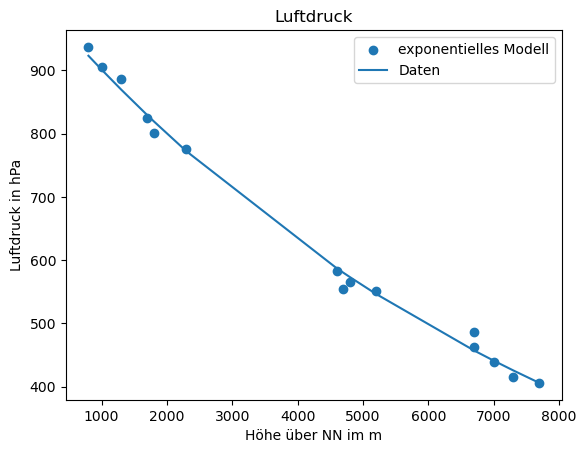

In [36]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt #Graphics Package
import statsmodels.api as sm


########
# Exponentielle Regression
#####

barometrie = pd.read_csv('luftdruck.csv')                          #Daten einlesen
 
plt.scatter(barometrie.Hoehe,barometrie.Luftdruck)                                #Streudiagramm
plt.title('Luftdruck')                                                          #Titel
plt.xlabel('Höhe über NN im m')                                                 #Bezeichnung x-Achse
plt.ylabel('Luftdruck in hPa')                                                  #Bezeichnung y-Achse

# exponentielles Modell

Y = np.log(barometrie.Luftdruck)                                                   #Logarithmieren der abhängigen Werte 
X= sm.add_constant(barometrie.Hoehe)                                                           #erweiterte Datenmatrix

myExpModel=sm.OLS(Y,X)                                                          #Definition des Modells: Lineares Modell für logarithmierte Werte
ExpResult=myExpModel.fit()                                                      #Berechnung der wichtigen Werte für das Modell

# Modell in Streudiagramm zeichnen
#ExpModellWerte=ExpResult.predict(sorted(barometrie.Hoehe))                      #Modellwerte
#plt.plot(sorted(barometrie.Hoehe),np.exp(ExpModellWerte))                        #Modell in Streudiagramm zeichnen
#plt.legend([ 'exponentielles Modell','Daten'],loc='upper right') #Legende

sortedData = sm.add_constant(sorted(barometrie.Hoehe))
ExpModellWerte = ExpResult.predict(sortedData)

plt.plot(sorted(barometrie.Hoehe),np.exp(ExpModellWerte))                        #Modell in Streudiagramm zeichnen
plt.legend([ 'exponentielles Modell','Daten'],loc='upper right') #Legende


[0.00758096 0.06606885 4.02922731]


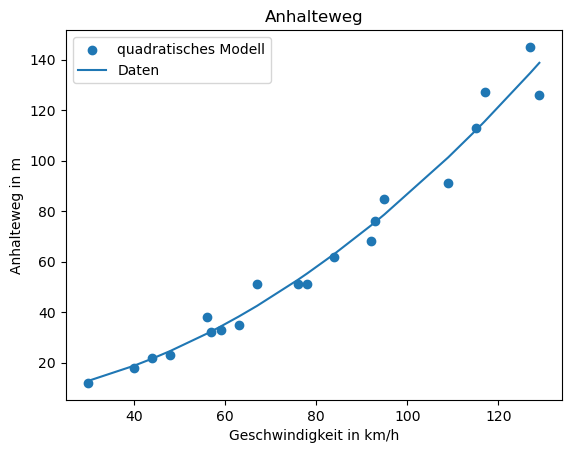

In [37]:
anhalten=pd.read_csv('anhalten.csv')            #Daten einlesen

#Streudiagramm
plt.scatter(anhalten.Geschwindigkeit,anhalten.Anhalteweg)       #Streudiagramm
plt.title('Anhalteweg')                                         #Titel
plt.xlabel('Geschwindigkeit in km/h')                           #Bezeichnung x-Achse
plt.ylabel('Anhalteweg in m')                                   #Bezeichnung y-Achse



###### Quadratisches Modell berechnen und Modellkurve einzeichnen

myQuadraticModel = np.polyfit(anhalten.Geschwindigkeit,anhalten.Anhalteweg,2)   #Definition des Modells: quadratisches Modell: 2 für Polynom 2. Grades 
S=np.polyval(myQuadraticModel,sorted(anhalten.Geschwindigkeit))                 #Modellwerte berechnen
plt.plot(sorted(anhalten.Geschwindigkeit),S)                                    #Modell in Streudiagramm einzeichnen


plt.legend([ 'quadratisches Modell','Daten',],loc='upper left')#Legende

